In [ ]:
import sys

sys.path.append("../src/")

import importlib
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lib
import p3inn

importlib.reload(lib)
importlib.reload(p3inn)

<module 'p3inn' from '/Users/r/Documents/stud/ss24/finnpinn/paper/../src/p3inn/__init__.py'>

In [ ]:
finn_out_path = Path("../data_out/finn/")
finn_root = finn_out_path / "p3inn_core2_new_multiprocessing"

btc_dataspan_quantiles = dict()
for p in finn_root.iterdir():
    finn_dir = lib.FinnDir(p)
    q_ = float(p.name.split("_")[-1])
    if "up" in p.name:
        q = 0.5 + q_ / 2
    elif "down" in p.name:
        q = 0.5 - q_ / 2
    else:
        raise RuntimeError()
    btc_dataspan_quantiles[f"{q:g}"] = (
        np.load(finn_dir.t_train_path),
        np.load(finn_dir.c_train_path),
    )

In [17]:
np.array(sorted(btc_dataspan_quantiles.keys(), key=float))

array(['0', '0.025', '0.0375', '0.05', '0.0625', '0.075', '0.0875', '0.1',
       '0.1125', '0.125', '0.1375', '0.15', '0.1625', '0.175', '0.1875',
       '0.2', '0.2125', '0.225', '0.2375', '0.25', '0.2625', '0.275',
       '0.2875', '0.3', '0.3125', '0.325', '0.3375', '0.35', '0.3625',
       '0.375', '0.3875', '0.4', '0.4125', '0.425', '0.4375', '0.45',
       '0.475', '0.5', '0.525', '0.55', '0.5625', '0.575', '0.5875',
       '0.6', '0.6125', '0.625', '0.6375', '0.65', '0.6625', '0.675',
       '0.6875', '0.7', '0.7125', '0.725', '0.7375', '0.75', '0.7625',
       '0.775', '0.7875', '0.8', '0.8125', '0.825', '0.8375', '0.85',
       '0.8625', '0.875', '0.8875', '0.9', '0.9125', '0.925', '0.9375',
       '0.95', '0.9625', '0.975', '1'], dtype='<U6')

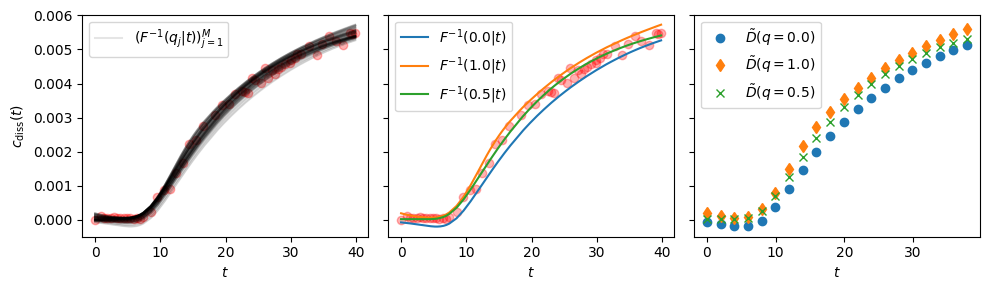

In [55]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 3), sharey=True)

axs[0].scatter(*lib.load_exp_data_numpy("Core 2"), color="red", alpha=0.3)
for k, v in btc_dataspan_quantiles.items():
    axs[0].plot(
        *v,
        color="k",
        alpha=0.1,
        label="$(F^{-1}(q_j | t))_{j=1}^{M}$" if k == "0" else "",
    )
axs[0].set_xlabel("$t$")
axs[0].set_ylabel("$c_{\\text{diss}}(t)$")
axs[0].legend()

axs[1].scatter(*lib.load_exp_data_numpy("Core 2"), color="red", alpha=0.3)
axs[1].plot(*btc_dataspan_quantiles["0"], label="$F^{-1}(0.0 | t)$")
axs[1].plot(*btc_dataspan_quantiles["1"], label="$F^{-1}(1.0 | t)$")
axs[1].plot(*btc_dataspan_quantiles["0.475"], label="$F^{-1}(0.5 | t)$")
axs[1].legend()
axs[1].set_xlabel("$t$")


def skipper(x_y):
    x, y = x_y
    return x[::50], y[::50]


axs[2].plot(*skipper(btc_dataspan_quantiles["0"]), "o", label="$\\tilde{D}(q=0.0)$")
axs[2].plot(*skipper(btc_dataspan_quantiles["1"]), "d", label="$\\tilde{D}(q=1.0)$")
axs[2].plot(*skipper(btc_dataspan_quantiles["0.475"]), "x", label="$\\tilde{D}(q=0.5)$")
axs[2].legend()
axs[2].set_xlabel("$t$")

plt.tight_layout()
plt.savefig("figs/btc_dataspan_quantiles.png")
plt.show()